# Project 3 
## Stefan Popov







### Building the project. 

  This project comes with a provided Makefile, as specified in the instructions. To build all executables for this project, simply use the command <br><br>
<div align="center"><i>make</i></div> <br> in Terminal or Command Prompt. <br><br> The executable  <br><br>

<div align="center"><i>kepler.exe</i></div> <br><br> would need to be manually executed to create the required files for this project. <br><br>To redirect the other files' output to a file, simply use the commands <br><br>
<div align="center"><i>./vandermonde.exe > "vandermonde.txt"</i></div><br><br>

and <br><br>
<div align="center"><i>./test_newton.exe > "test_newton.txt" </i></div><br><br>

in the Terminal or Command Prompt. <br><br><br><br>
To delete all output files simply use the command 
<div align="center"><i>make clean</i></div><br><br>
To delete all output files and executables, type in 
<div align="center"><i>make realclean</i></div><br><br>


### 1. Newton Interpolation
In the first part of this project, we were to construct an interpolating polynomial in Newton form. To do so, we were given the following specifications : <br><br>
When asked to interpolate $n+1$ distinct data points $(x_0,y_0),(x_1,y_1), ... , (x_n,y_n)$ by a polynomial of formal degree n using Newton form as<br><br> $$p_n(x)= a_0 + a_1(x-x_0)+ a_2(x-x_0)(x-x_1) +       ... + a_n(x-x_0)(x-x_1)...(x-x_{n-1})$$<br><br>

We would take the construction of Newton form to be the process for determining the n+1 unknown coefficients $a_0,a_1, ..., a_n$ using the $n+1$ interpolating conditions $p_n(x_0)=y_0, p_n(x_1)=y_1, ... , p_n(x_n)=y_n$. If one more data point $(x_{n+1},y_{n+1})$ is added to the previous $n+1$ data points, the new interpolating polynomial of degree $n+1$ that interpolates the expanded data set can be written as <br><br>$$p_{n+1}(x)=p_n(x)+ a_{n+1}(x-x_0)(x-x_1)...(x-x_n).$$<br><br>
The extra coefficient $a_{n+1}$ is given by $$a_{n+1}= \frac{y_{n+1} - p_n(x_{n+1})}{(x_{n+1}-x_0)(x_{n+1}-x_1)...(x_{n+1} - x_n)}$$<br><br>
providing a recursive formula to find the coefficients $a_1,a_2,...$ by starting with $p_0(x)=a_0=y_0$ and letting $n$ take tha values $0,1,...$ in the above formula.<br><br>
When using the above recursion we would need to acquire $p_n(x_{n+1})$, which we would do by using nested multiplication. The product $(x_{n+1} - x_0)(x_{n+1}-x_1)...(x_{n+1}-x_n)$ by evaluatin the Newton's basis function <br><br>$$\phi_{n+1}(x)=(x-x_0)(x-x_1)...(x-x_n)$$<br><br>

We would write three C++ functions to fulfill the above : 

which purpose is to evaluate the Newton basis function $\phi_{n+1}(x)$. The nodes are passed to the function as a matrix object, as well as the value of x and it returns the evaluation. <br><br> 

which would evaluate the Newton form $p_n(x)$ using nested multiplication. It would take the coefficients in a Matrix a as a parameter, along with the x nodes and the x used to evaluate. The function would return the evaluation $p_n(x)$.<br><br> 

This function constructs the Newton form of an interpolating polynomial. The two input matrices contain the x-values and y-values of the data points $(x_0,y_0),(x_1,y_1)...$ to be used by the function. The output matrix contains the coefficients $a_0,a_1,...$ for the Newton form.<br><br>

Finally, we would write a C++ file test_Newtonform.cpp to test those functions by interpolating the data $(x_i,y_i) (0<=i<=4)$ generated by the polynomial $f(x)= 3.1x^4+2.3x^3-6.6x^2+8.7x+7.9$, where the nodes $x_i$ are -2,-1,0,1,2 and $y_i = f(x_i)$. <br><br> 
After constructing the interpolating polynomial $p_4(x)$, we would plot it along with the function $f(x)$, by evaluating them both at 201 equally spaced x-values on the interval [-3,3]. In another figure we would plot the error $f(x) - p_4(x)$ using the same 201 points. Theoretically, we would expect $p_4(x)$ and $f(x)$ to be very similar because the interpolating polynomial goes through the data points defined and the error we get should be very small and approaching 0. 

<br><br> 
The following code was used to construct and evaluate the interpolating polynomial $p_4(x)$. In the code we would start by declaring the data points and evaluating the coefficients matrix for them. We then move on to calculating the interpolation matrix, the actual $f(x)$ values and the error, as described in the comments. <br><br>

<br><br> 
The code produced the following plots when loaded into our jupyter notebook. <br><br>

In [7]:
%pylab inline
error = loadtxt('error.txt')
x = loadtxt('x.txt')
xInterpol= loadtxt('xInterpol.txt')
y = loadtxt('y.txt')

Populating the interactive namespace from numpy and matplotlib


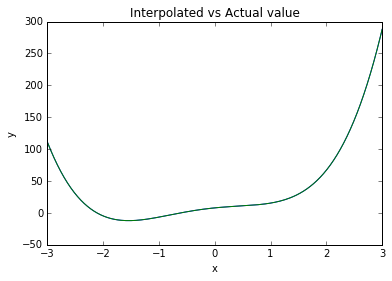

In [8]:
plot(x,y)
xlabel('x')
ylabel('y')
title('Interpolated vs Actual value')
plot(x, xInterpol)

As expected, the interpolating polynomial $p_4(x)$ produces very similar results to what is presented by $f(x)$. This is because the polynomial was built to go through the same data points and only slight errors might occur at times.

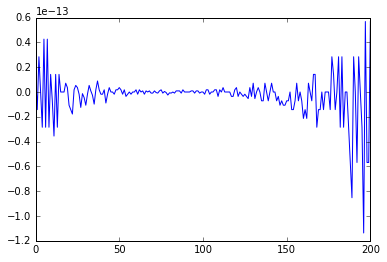

In [9]:
plot(error)

The plot of the error $f(x) - p_4(x)$ shows us that there are varying errors......

### 2. Multi-dimensional interpolation

After being provided a C++ function for evaluating the polynomial interpolant of a set of data points using the Lagrange basis, we were to carry out multi-dimensional interpolation, using the simplest approach, when the data is regularly-spaced over a rectangle and the interpolant is created as a multi-dimensional version of the Lagrange interpolating polynomial. By considering the 1D Lagrange basis functions provided, we may construct a set of 2D Lagrange basis functions via the product of the two bases <br><br> $$l_{i,j}(x,y)= \phi_i(x)\psi(y)$$ <br><center>where $i=1,...,m$ and   $j=1,...,n$. </center>


Our 2D Lagrange interpolant for an arbitrary function $f(x,y)$ at the nodes $(x_i,y_j)$ may be computed at a point $(a,b)$ as $$p(a,b)=\sum_{i=0}^{m}\sum_{j=0}^nf(x_i,y_j)l_{i,j}(a,b)$$<br>
We would construct the C++ function Lagrange2D with the following signature 

<center><b>double Lagrange2D(Matrix& x, Matrix& y, Matrix& f, double a, double b);</b></center>

where x is the input vector of length $m+1$, y is an input vector of length $n+1$, f is an input matrix
in $R^{(m+1)×(n+1)}$ that holds the function values $f(x_i,y_j)$, and the doubles $a$ and $b$ correspond to an evaluation point in the $x-y$ plane. The function evaluates and returns $p(a,b)$. The function was tested with the provided test routine in the file <b>test_Lagrange2D.cpp</b> along with the jupyter notebook plot_Lagrange2D.ipynb.